<a href="https://colab.research.google.com/github/Tharindi-W/ConcrStrengthRegression/blob/main/NYC_SAT_RESULTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# import libraries
import pandas as pd
import sqlite3

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/sat_results.csv')  # Replace with the actual path to your CSV file

# Create a SQLite database in memory
conn = sqlite3.connect(':memory:')

# Write the DataFrame to a table in the SQLite database
df.to_sql('sat_results', conn, index=False, if_exists='replace')

# TASK01
# SQL query to find schools that failed to report exam results
query = '''
    SELECT "DBN", "SCHOOL NAME"
    FROM sat_results
    WHERE
        NOT "Num of SAT Test Takers" GLOB '[0-9]*' OR
        NOT "SAT Critical Reading Avg. Score" GLOB '[0-9]*' OR
        NOT "SAT Math Avg. Score" GLOB '[0-9]*' OR
        NOT "SAT Writing Avg. Score" GLOB '[0-9]*'
'''

# Execute the SQL query
result = pd.read_sql_query(query, conn)

# Display the result
print(result)


              DBN                                        SCHOOL NAME
0          02M392                         MANHATTAN BUSINESS ACADEMY
1          02M393                          BUSINESS OF SPORTS SCHOOL
2          02M399         THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY
3          02M427              MANHATTAN ACADEMY FOR ARTS & LANGUAGE
4          02M437        HUDSON HIGH SCHOOL OF LEARNING TECHNOLOGIES
5          02M438          INTERNATIONAL HIGH SCHOOL AT UNION SQUARE
6          02M473                             WASHINGTON IRVING YABC
7          03M402        THE URBAN ASSEMBLY SCHOOL FOR GREEN CAREERS
8          03M403                  THE GLOBAL LEARNING COLLABORATIVE
9          03M417                          FRANK MCCOURT HIGH SCHOOL
10         03M577  YOUNG ADULT BOROUGH CENTER AT LOUIS D. BRANDEI...
11         05M362  COLUMBIA SECONDARY SCHOOL FOR MATH, SCIENCE, A...
12         06M423          HIGH SCHOOL FOR EXCELLENCE AND INNOVATION
13         07X379                 

In [8]:
# Task 02
# SQL query to find the top 5 schools with the highest scores in math
math_query = '''
    SELECT "DBN", "SCHOOL NAME", "SAT Math Avg. Score"
    FROM sat_results
    WHERE "SAT Math Avg. Score" IS NOT NULL
    ORDER BY CAST("SAT Math Avg. Score" AS INTEGER) DESC
    LIMIT 5
'''

# SQL query to find the top 5 schools with the highest scores in writing
writing_query = '''
    SELECT "DBN", "SCHOOL NAME", "SAT Writing Avg. Score"
    FROM sat_results
    WHERE "SAT Writing Avg. Score" IS NOT NULL
    ORDER BY CAST("SAT Writing Avg. Score" AS INTEGER) DESC
    LIMIT 5
'''

# SQL query to find the top 5 schools with the highest scores in reading
reading_query = '''
    SELECT "DBN", "SCHOOL NAME", "SAT Critical Reading Avg. Score"
    FROM sat_results
    WHERE "SAT Critical Reading Avg. Score" IS NOT NULL
    ORDER BY CAST("SAT Critical Reading Avg. Score" AS INTEGER) DESC
    LIMIT 5
'''

# Execute the SQL queries
top_math_schools = pd.read_sql_query(math_query, conn)
top_writing_schools = pd.read_sql_query(writing_query, conn)
top_reading_schools = pd.read_sql_query(reading_query, conn)

# Display the results
print("Top 5 schools with the highest math scores:")
print(top_math_schools)

print("\nTop 5 schools with the highest writing scores:")
print(top_writing_schools)

print("\nTop 5 schools with the highest reading scores:")
print(top_reading_schools)


Top 5 schools with the highest math scores:
      DBN                                        SCHOOL NAME  \
0  02M475                             STUYVESANT HIGH SCHOOL   
1  10X445                       BRONX HIGH SCHOOL OF SCIENCE   
2  31R605                STATEN ISLAND TECHNICAL HIGH SCHOOL   
3  28Q687  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...   
4  13K430                     BROOKLYN TECHNICAL HIGH SCHOOL   

  SAT Math Avg. Score  
0                 735  
1                 688  
2                 682  
3                 660  
4                 659  

Top 5 schools with the highest writing scores:
      DBN                                        SCHOOL NAME  \
0  02M475                             STUYVESANT HIGH SCHOOL   
1  10X445                       BRONX HIGH SCHOOL OF SCIENCE   
2  25Q525                        TOWNSEND HARRIS HIGH SCHOOL   
3  10X696  HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE   
4  31R605                STATEN ISLAND TECHNICAL HIGH SCHOO

In [11]:
# TASK 03
# SQL query to find the bottom 5 schools with the lowest scores in math
bottom_math_query = '''
    SELECT "DBN", "SCHOOL NAME", "SAT Math Avg. Score"
    FROM sat_results
    WHERE "SAT Math Avg. Score" IS NOT NULL
    AND "SAT Math Avg. Score" != ''
    AND "SAT Math Avg. Score" GLOB '[0-9]*'
    ORDER BY CAST("SAT Math Avg. Score" AS INTEGER) ASC
    LIMIT 5
'''

# SQL query to find the bottom 5 schools with the lowest scores in writing
bottom_writing_query = '''
    SELECT "DBN", "SCHOOL NAME", "SAT Writing Avg. Score"
    FROM sat_results
    WHERE "SAT Writing Avg. Score" IS NOT NULL
    AND "SAT Writing Avg. Score" != ''
    AND "SAT Writing Avg. Score" GLOB '[0-9]*'
    ORDER BY CAST("SAT Writing Avg. Score" AS INTEGER) ASC
    LIMIT 5
'''

# SQL query to find the bottom 5 schools with the lowest scores in reading
bottom_reading_query = '''
    SELECT "DBN", "SCHOOL NAME", "SAT Critical Reading Avg. Score"
    FROM sat_results
    WHERE "SAT Critical Reading Avg. Score" IS NOT NULL
    AND "SAT Critical Reading Avg. Score" != ''
    AND "SAT Critical Reading Avg. Score" GLOB '[0-9]*'
    ORDER BY CAST("SAT Critical Reading Avg. Score" AS INTEGER) ASC
    LIMIT 5
'''

# Execute the SQL queries
bottom_math_schools = pd.read_sql_query(bottom_math_query, conn)
bottom_writing_schools = pd.read_sql_query(bottom_writing_query, conn)
bottom_reading_schools = pd.read_sql_query(bottom_reading_query, conn)

# Display the results
print("Bottom 5 schools with the lowest math scores:")
print(bottom_math_schools)

print("\nBottom 5 schools with the lowest writing scores:")
print(bottom_writing_schools)

print("\nBottom 5 schools with the lowest reading scores:")
print(bottom_reading_schools)


Bottom 5 schools with the lowest math scores:
      DBN                       SCHOOL NAME SAT Math Avg. Score
0  09X403   BRONX INTERNATIONAL HIGH SCHOOL                 312
1  09X543  HIGH SCHOOL FOR VIOLIN AND DANCE                 315
2  32K564    BUSHWICK COMMUNITY HIGH SCHOOL                 317
3  05M285    HARLEM RENAISSANCE HIGH SCHOOL                 318
4  18K563        IT TAKES A VILLAGE ACADEMY                 320

Bottom 5 schools with the lowest writing scores:
      DBN                                       SCHOOL NAME  \
0  19K583                         MULTICULTURAL HIGH SCHOOL   
1  17K524     INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS   
2  09X365               ACADEMY FOR LANGUAGE AND TECHNOLOGY   
3  12X388  PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE   
4  15K520                               PACIFIC HIGH SCHOOL   

  SAT Writing Avg. Score  
0                    286  
1                    291  
2                    297  
3                    298  
4     

In [12]:
# TASK 04
# SQL query to calculate the average score for each school across all three subjects
average_score_query = '''
    SELECT "DBN", "SCHOOL NAME",
        AVG(CAST("SAT Math Avg. Score" AS INTEGER)) AS avg_math_score,
        AVG(CAST("SAT Writing Avg. Score" AS INTEGER)) AS avg_writing_score,
        AVG(CAST("SAT Critical Reading Avg. Score" AS INTEGER)) AS avg_reading_score,
        AVG(
            CAST("SAT Math Avg. Score" AS INTEGER) +
            CAST("SAT Writing Avg. Score" AS INTEGER) +
            CAST("SAT Critical Reading Avg. Score" AS INTEGER)
        ) / 3 AS overall_avg_score
    FROM sat_results
    WHERE
        "SAT Math Avg. Score" IS NOT NULL AND "SAT Math Avg. Score" != '' AND "SAT Math Avg. Score" GLOB '[0-9]*' AND
        "SAT Writing Avg. Score" IS NOT NULL AND "SAT Writing Avg. Score" != '' AND "SAT Writing Avg. Score" GLOB '[0-9]*' AND
        "SAT Critical Reading Avg. Score" IS NOT NULL AND "SAT Critical Reading Avg. Score" != '' AND "SAT Critical Reading Avg. Score" GLOB '[0-9]*'
    GROUP BY "DBN", "SCHOOL NAME"
'''

# SQL query to retrieve the top 10 schools with the highest average scores
top_10_average_query = '''
    SELECT "DBN", "SCHOOL NAME", overall_avg_score
    FROM (
        {}
    ) AS avg_scores
    ORDER BY overall_avg_score DESC
    LIMIT 10
'''.format(average_score_query)

# Execute the SQL query
top_10_average_schools = pd.read_sql_query(top_10_average_query, conn)

# Display the results
print("Top 10 schools with the highest average scores:")
print(top_10_average_schools)


Top 10 schools with the highest average scores:
      DBN                                        SCHOOL NAME  \
0  02M475                             STUYVESANT HIGH SCHOOL   
1  10X445                       BRONX HIGH SCHOOL OF SCIENCE   
2  31R605                STATEN ISLAND TECHNICAL HIGH SCHOOL   
3  10X696  HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE   
4  25Q525                        TOWNSEND HARRIS HIGH SCHOOL   
5  28Q687  QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...   
6  01M696                     BARD HIGH SCHOOL EARLY COLLEGE   
7  05M692  HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...   
8  13K430                     BROOKLYN TECHNICAL HIGH SCHOOL   
9  02M416                      ELEANOR ROOSEVELT HIGH SCHOOL   

   overall_avg_score  
0         698.666667  
1         656.333333  
2         651.000000  
3         640.000000  
4         636.666667  
5         622.666667  
6         618.666667  
7         615.666667  
8         611.000000  
9         586.000

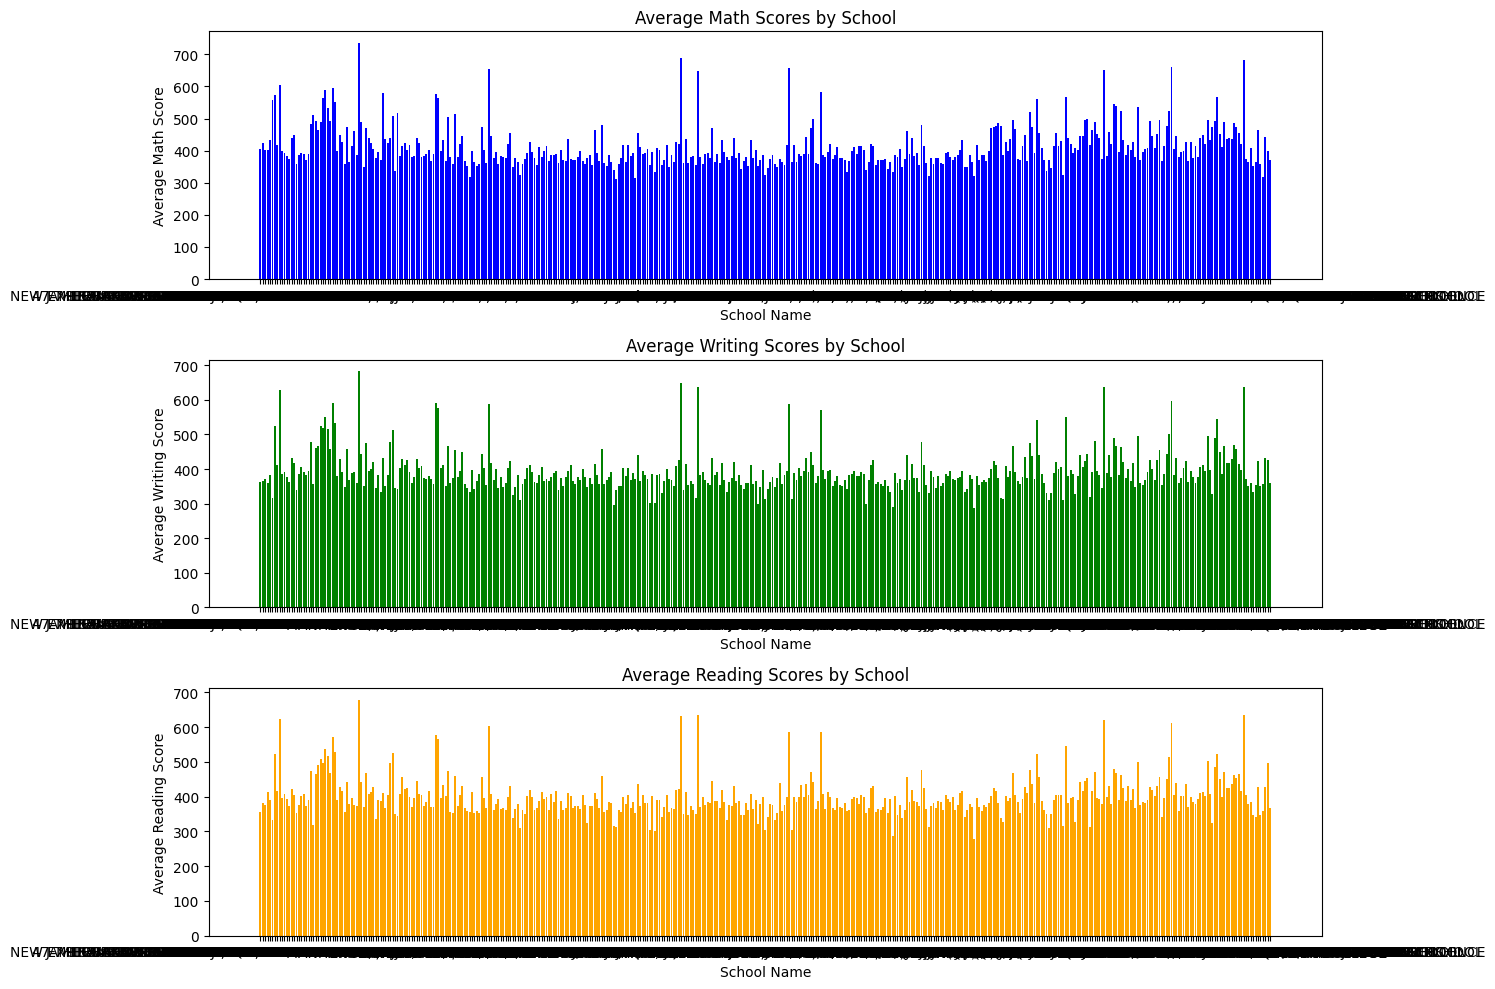

In [13]:
# import libraries
import matplotlib.pyplot as plt

# TASK 05
# SQL query to calculate the average score for each school across all three subjects
average_score_query = '''
    SELECT "DBN", "SCHOOL NAME",
        AVG(CAST("SAT Math Avg. Score" AS INTEGER)) AS avg_math_score,
        AVG(CAST("SAT Writing Avg. Score" AS INTEGER)) AS avg_writing_score,
        AVG(CAST("SAT Critical Reading Avg. Score" AS INTEGER)) AS avg_reading_score,
        AVG(
            CAST("SAT Math Avg. Score" AS INTEGER) +
            CAST("SAT Writing Avg. Score" AS INTEGER) +
            CAST("SAT Critical Reading Avg. Score" AS INTEGER)
        ) / 3 AS overall_avg_score
    FROM sat_results
    WHERE
        "SAT Math Avg. Score" IS NOT NULL AND "SAT Math Avg. Score" != '' AND "SAT Math Avg. Score" GLOB '[0-9]*' AND
        "SAT Writing Avg. Score" IS NOT NULL AND "SAT Writing Avg. Score" != '' AND "SAT Writing Avg. Score" GLOB '[0-9]*' AND
        "SAT Critical Reading Avg. Score" IS NOT NULL AND "SAT Critical Reading Avg. Score" != '' AND "SAT Critical Reading Avg. Score" GLOB '[0-9]*'
    GROUP BY "DBN", "SCHOOL NAME"
'''

# Execute the SQL query
average_scores = pd.read_sql_query(average_score_query, conn)

# Exclude schools without results
average_scores = average_scores[
    (average_scores['avg_math_score'].notna()) &
    (average_scores['avg_writing_score'].notna()) &
    (average_scores['avg_reading_score'].notna())
]

# Plotting the graphs
plt.figure(figsize=(15, 10))

# Graph for Math Scores
plt.subplot(3, 1, 1)
plt.bar(average_scores["SCHOOL NAME"], average_scores["avg_math_score"], color='blue')
plt.title('Average Math Scores by School')
plt.xlabel('School Name')
plt.ylabel('Average Math Score')

# Graph for Writing Scores
plt.subplot(3, 1, 2)
plt.bar(average_scores["SCHOOL NAME"], average_scores["avg_writing_score"], color='green')
plt.title('Average Writing Scores by School')
plt.xlabel('School Name')
plt.ylabel('Average Writing Score')

# Graph for Reading Scores
plt.subplot(3, 1, 3)
plt.bar(average_scores["SCHOOL NAME"], average_scores["avg_reading_score"], color='orange')
plt.title('Average Reading Scores by School')
plt.xlabel('School Name')
plt.ylabel('Average Reading Score')

plt.tight_layout()
plt.show()


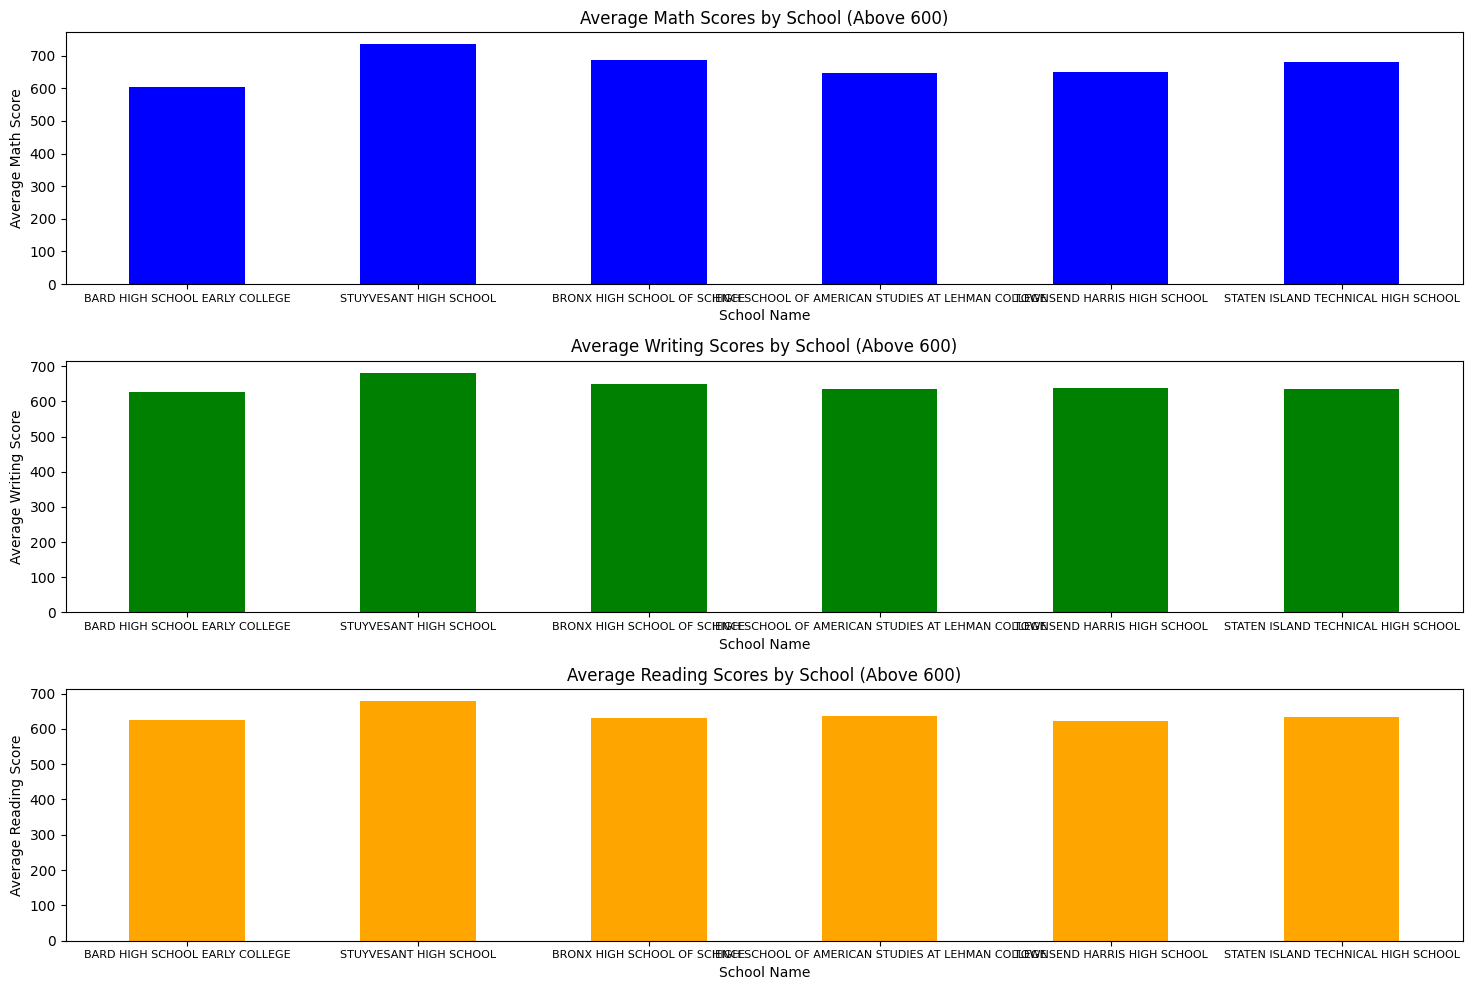

In [18]:
# TASK 06
# SQL query to calculate the average score for each school across all three subjects and score above 600
average_score_query = '''
    SELECT "DBN", "SCHOOL NAME",
        AVG(CAST("SAT Math Avg. Score" AS INTEGER)) AS avg_math_score,
        AVG(CAST("SAT Writing Avg. Score" AS INTEGER)) AS avg_writing_score,
        AVG(CAST("SAT Critical Reading Avg. Score" AS INTEGER)) AS avg_reading_score,
        AVG(
            CAST("SAT Math Avg. Score" AS INTEGER) +
            CAST("SAT Writing Avg. Score" AS INTEGER) +
            CAST("SAT Critical Reading Avg. Score" AS INTEGER)
        ) / 3 AS overall_avg_score
    FROM sat_results
    WHERE
        CAST("SAT Math Avg. Score" AS INTEGER) >= 600 AND
        CAST("SAT Writing Avg. Score" AS INTEGER) >= 600 AND
        CAST("SAT Critical Reading Avg. Score" AS INTEGER) >= 600
    GROUP BY "DBN", "SCHOOL NAME"
'''

# Execute the SQL query
average_scores = pd.read_sql_query(average_score_query, conn)

# Exclude schools without results
average_scores = average_scores[
    (average_scores['avg_math_score'].notna()) &
    (average_scores['avg_writing_score'].notna()) &
    (average_scores['avg_reading_score'].notna())
]

# Plotting the graphs
plt.figure(figsize=(15, 10))

# Graph for Math Scores
plt.subplot(3, 1, 1)
plt.bar(average_scores["SCHOOL NAME"], average_scores["avg_math_score"], color='blue', width=0.5)
plt.title('Average Math Scores by School (Above 600)')
plt.xlabel('School Name')
plt.ylabel('Average Math Score')
plt.xticks(rotation=0, ha='center', fontsize=8)

# Graph for Writing Scores
plt.subplot(3, 1, 2)
plt.bar(average_scores["SCHOOL NAME"], average_scores["avg_writing_score"], color='green', width=0.5)
plt.title('Average Writing Scores by School (Above 600)')
plt.xlabel('School Name')
plt.ylabel('Average Writing Score')
plt.xticks(rotation=0, ha='center', fontsize=8)

# Graph for Reading Scores
plt.subplot(3, 1, 3)
plt.bar(average_scores["SCHOOL NAME"], average_scores["avg_reading_score"], color='orange', width=0.5)
plt.title('Average Reading Scores by School (Above 600)')
plt.xlabel('School Name')
plt.ylabel('Average Reading Score')
plt.xticks(rotation=0, ha='center', fontsize=8)

plt.tight_layout()
plt.show()
